Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados ="churn_clientes.csv"

df_churn = pd.read_csv(dados)
df_churn.head()


,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,...,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,7590-VHVEG,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,3668-QPYBK,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,7795-CFOCW,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,...,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,9237-HQITU,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


In [2]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   genero                        7043 non-null   object 
 2   idoso                         7043 non-null   object 
 3   tem_parceiro                  7043 non-null   object 
 4   tem_dependentes               7043 non-null   object 
 5   meses_na_empresa              7043 non-null   int64  
 6   servico_telefone              7043 non-null   object 
 7   multiplas_linhas              7043 non-null   object 
 8   servico_internet              7043 non-null   object 
 9   servico_seguranca             7043 non-null   object 
 10  servico_backup                7043 non-null   object 
 11  servico_protecao_equipamento  7043 non-null   object 
 12  servico_suporte_tecnico       7043 non-null   object 
 13  str

In [3]:
df_churn.describe()

,meses_na_empresa,valor_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [4]:
df_churn['churn'].value_counts()

churn
Não    5174
Sim    1869
Name: count, dtype: int64

In [5]:
df_churn['churn'].value_counts(normalize=True) * 100

churn
Não    73.463013
Sim    26.536987
Name: proportion, dtype: float64

In [6]:
df_churn = df_churn.drop(columns="id_cliente", axis=1)

In [7]:
colunas_numericas = df_churn.select_dtypes(include='number').columns

colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

print(colunas_categoricas)
print(colunas_numericas)

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')
Index(['meses_na_empresa', 'valor_mensal', 'total_gasto'], dtype='object')


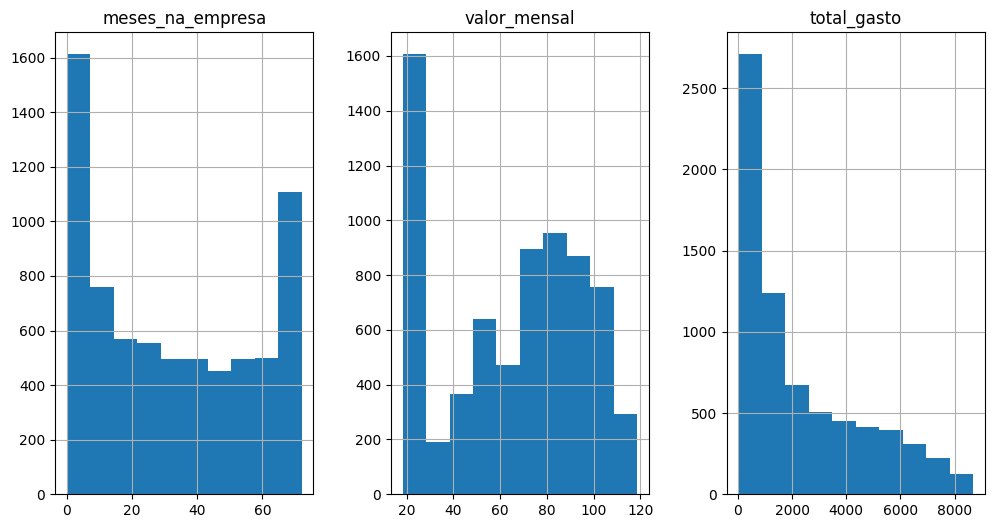

In [8]:
df_churn[colunas_numericas].hist(layout=(1,3),figsize=(12,6));

In [9]:
df_churn['meses_na_empresa'].value_counts(bins=10).sort_index()

(-0.073, 7.2]    1612
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(36.0, 43.2]      444
(43.2, 50.4]      452
(50.4, 57.6]      495
(57.6, 64.8]      501
(64.8, 72.0]     1109
Name: count, dtype: int64

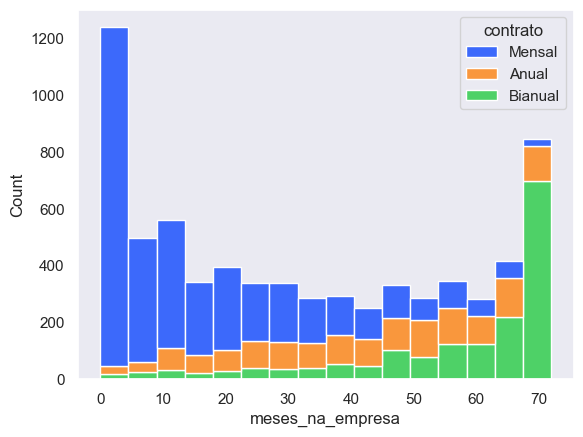

In [10]:
sns.set_theme(style="dark",
              palette='bright', context="notebook")

sns.histplot(x='meses_na_empresa', data=df_churn,hue='contrato',multiple='stack');

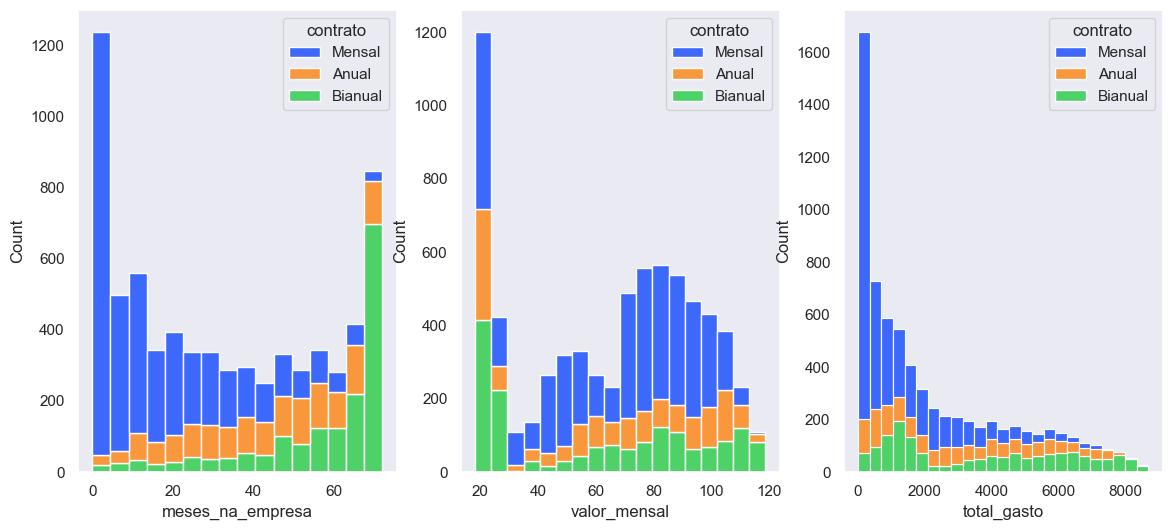

In [11]:
fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(14,6))
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna,data=df_churn,hue='contrato',multiple='stack',ax=axs[i])
plt.show()

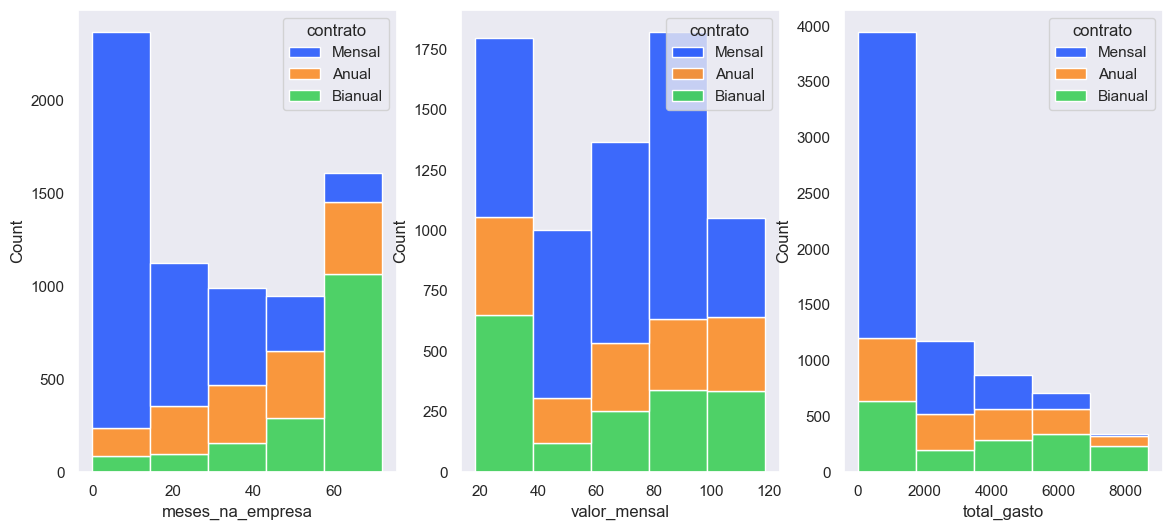

In [12]:
fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(14,6))
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna,data=df_churn,hue='contrato',multiple='stack',ax=axs[i],bins=5)
plt.show()

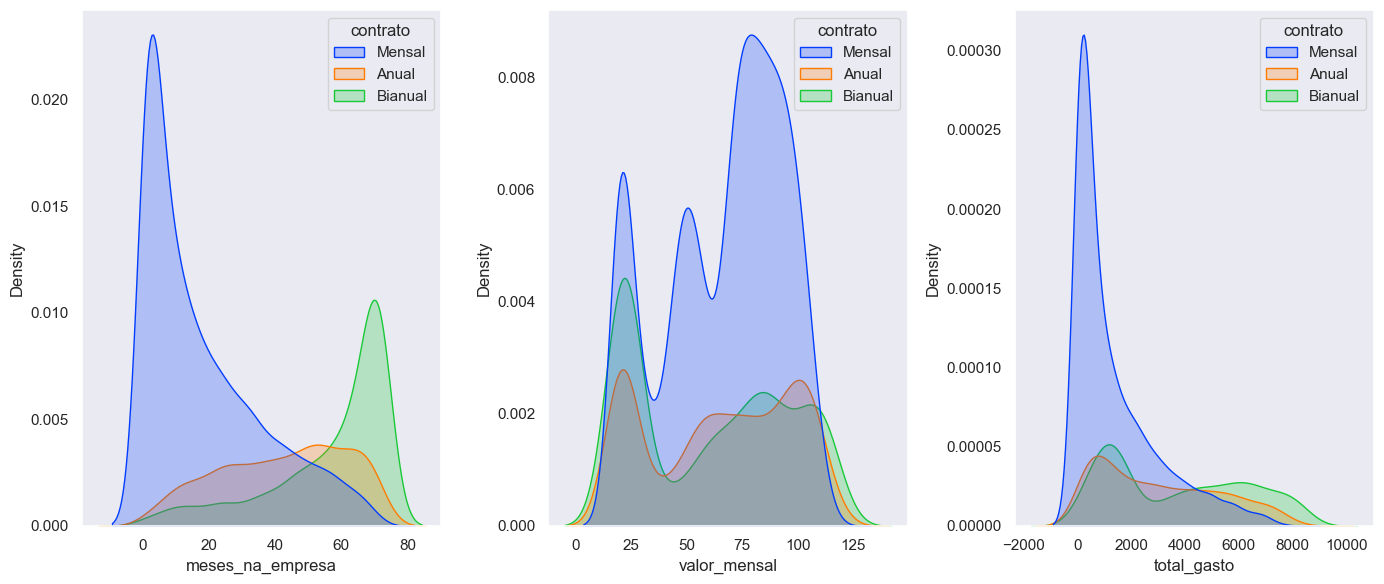

In [13]:
fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(14,6),tight_layout=True)
for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna,data=df_churn,hue='contrato',ax=axs[i],fill=True)
plt.show()

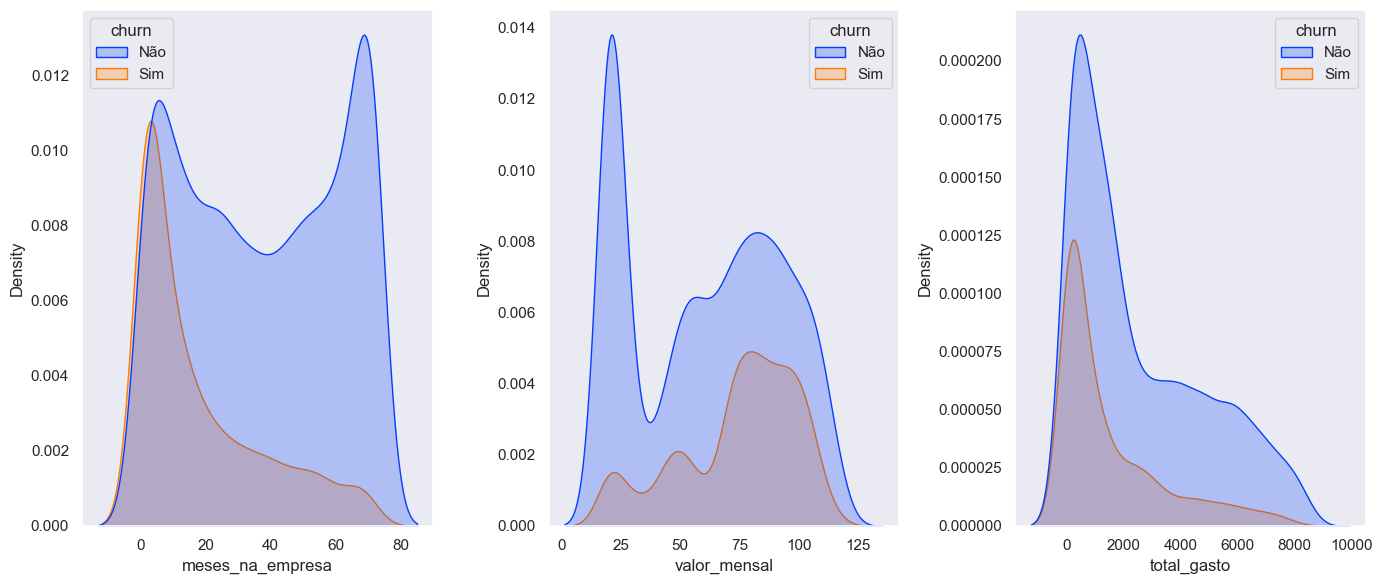

In [14]:
fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(14,6),tight_layout=True)
for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna,data=df_churn,hue='churn',ax=axs[i],fill=True)
plt.show()

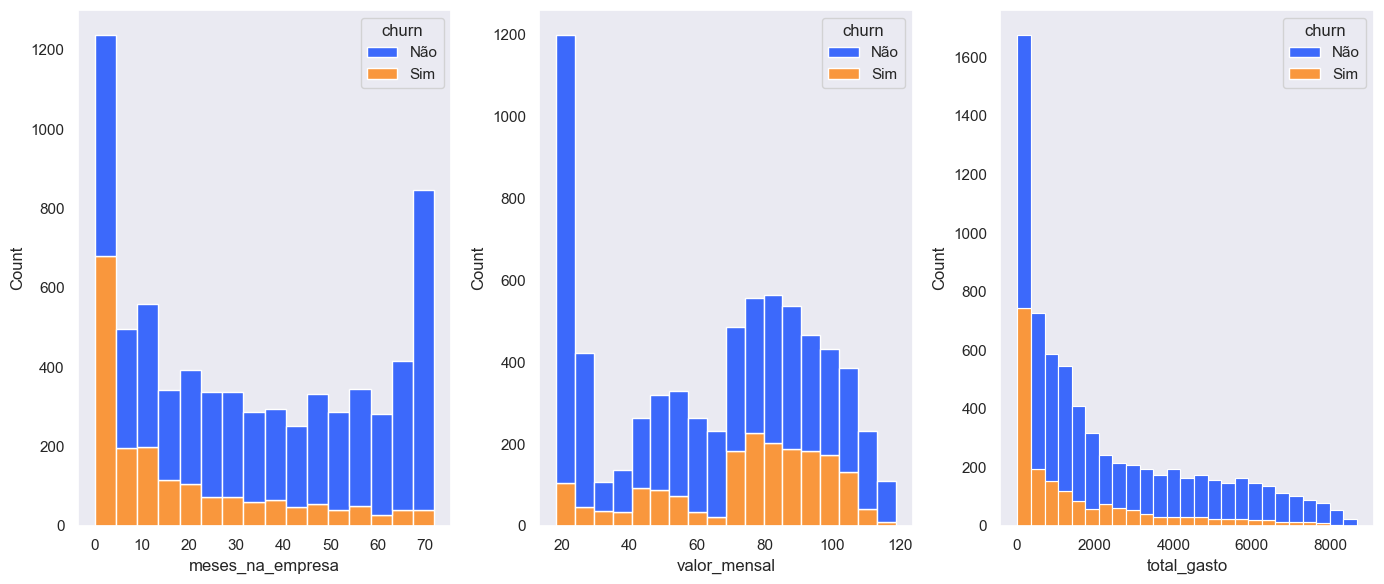

In [15]:
fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(14,6),tight_layout=True)
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna,data=df_churn,hue='churn',multiple='stack',ax=axs[i])
plt.show()

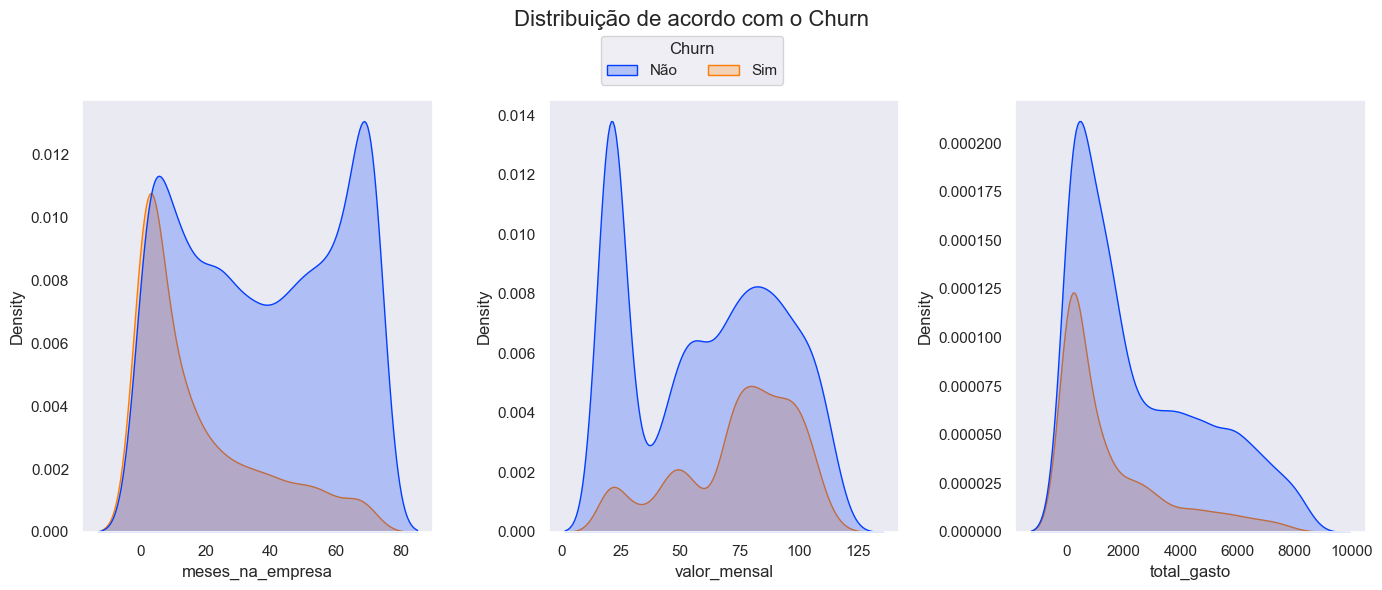

In [16]:
fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(14,6),tight_layout=True)
for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna,data=df_churn,hue='churn',ax=axs[i],fill=True)
    legenda = axs[i].get_legend()
    legenda.remove()

rotulos= [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title="Churn",bbox_to_anchor=(0.5,0.95))
fig.suptitle("Distribuição de acordo com o Churn\n\n", fontsize=16)
plt.show()

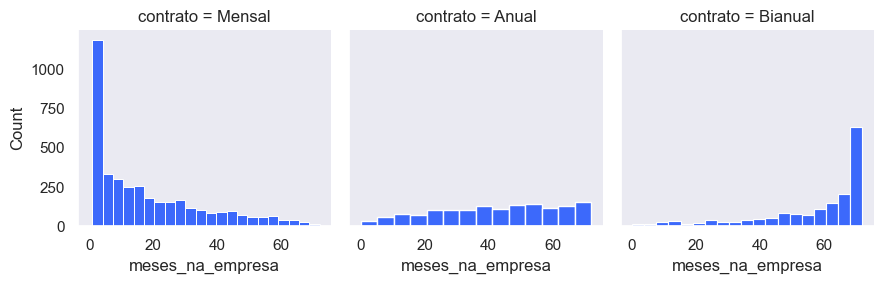

In [17]:
g = sns.FacetGrid(df_churn, col='contrato')
g.map_dataframe(sns.histplot, x='meses_na_empresa')
plt.show()

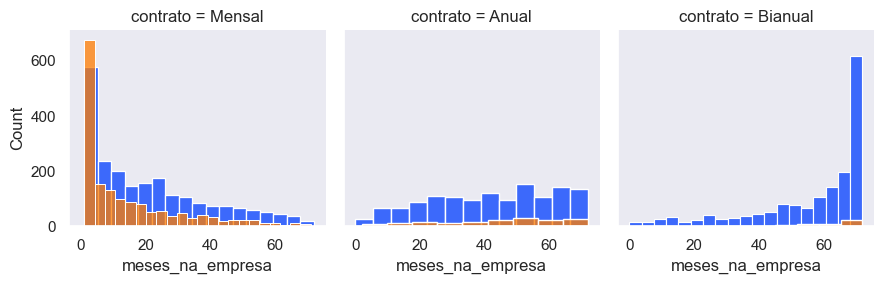

In [18]:
g = sns.FacetGrid(df_churn, col='contrato', hue='churn')
g.map_dataframe(sns.histplot, x='meses_na_empresa')
plt.show()

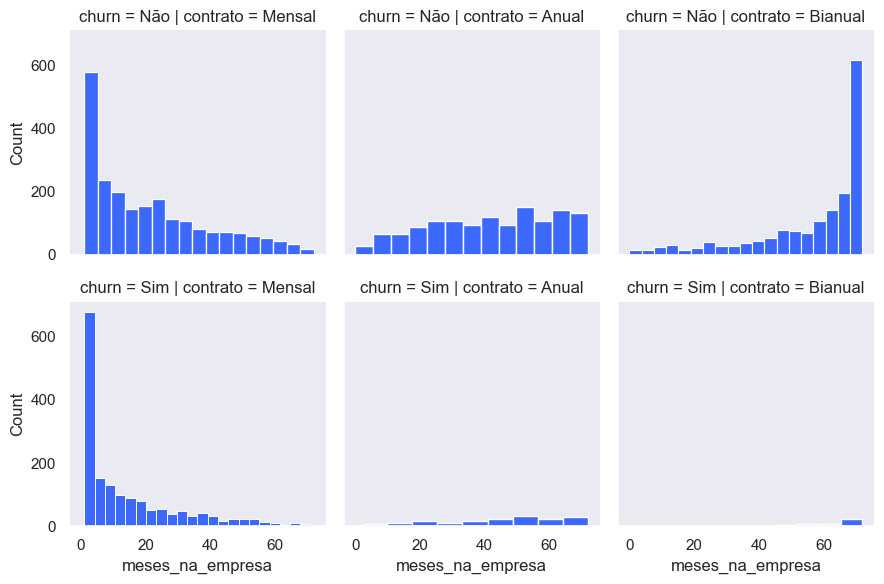

In [19]:
g = sns.FacetGrid(df_churn, col='contrato', row='churn')
g.map_dataframe(sns.histplot, x='meses_na_empresa')
plt.show()

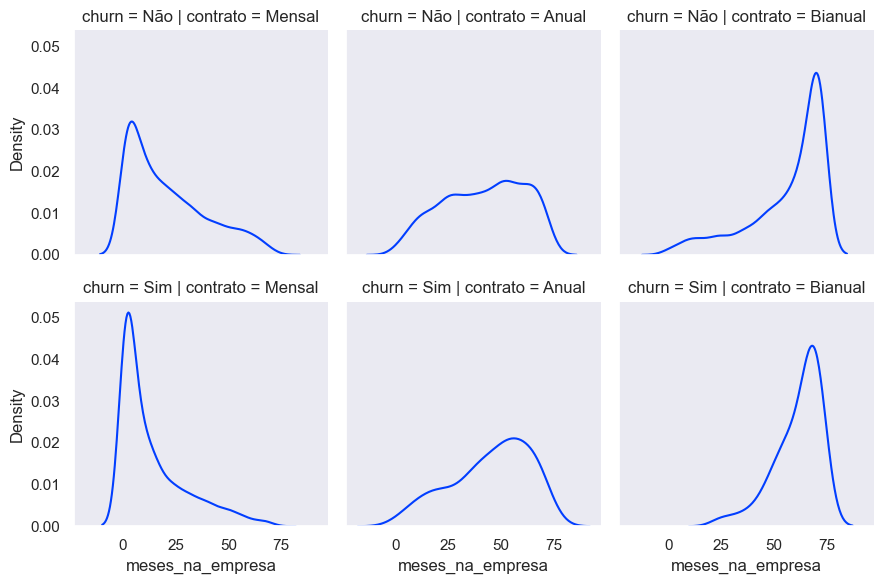

In [20]:
g = sns.FacetGrid(df_churn, col='contrato', row='churn')
g.map_dataframe(sns.kdeplot, x='meses_na_empresa')
plt.show()

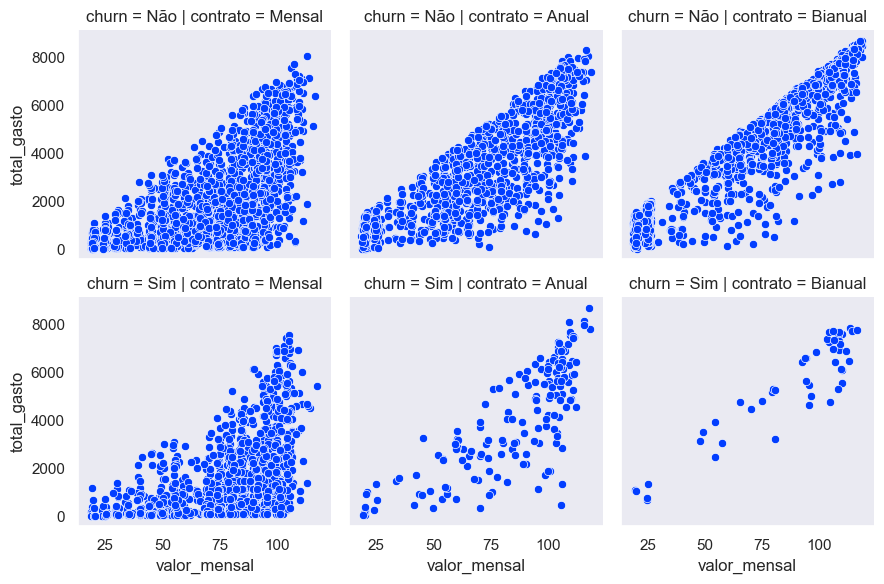

In [21]:
g = sns.FacetGrid(df_churn, col='contrato', row='churn')
g.map_dataframe(sns.scatterplot, x='valor_mensal', y='total_gasto')
plt.show()

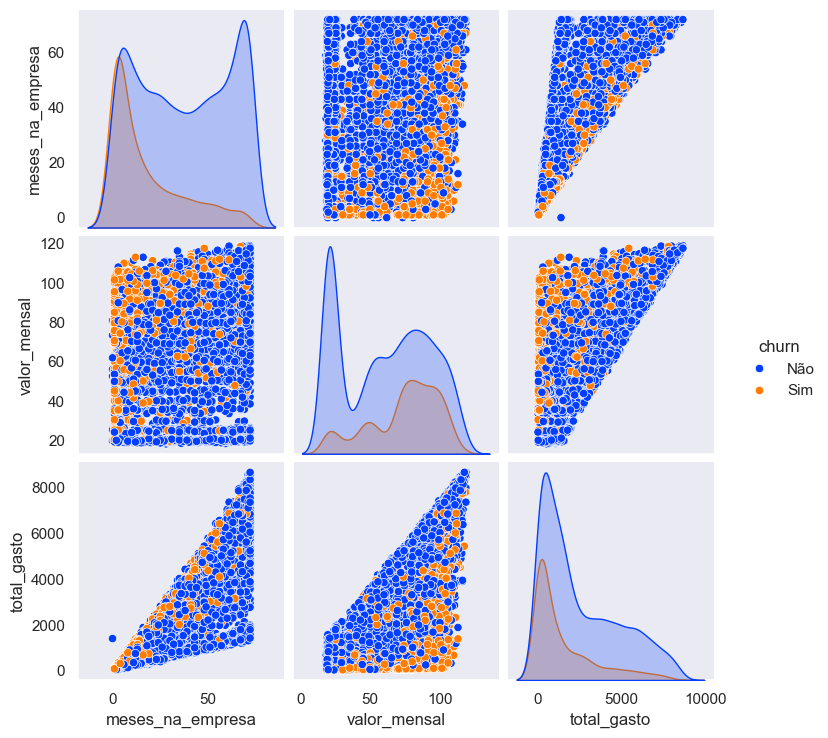

In [22]:
sns.pairplot(data=df_churn,hue='churn')

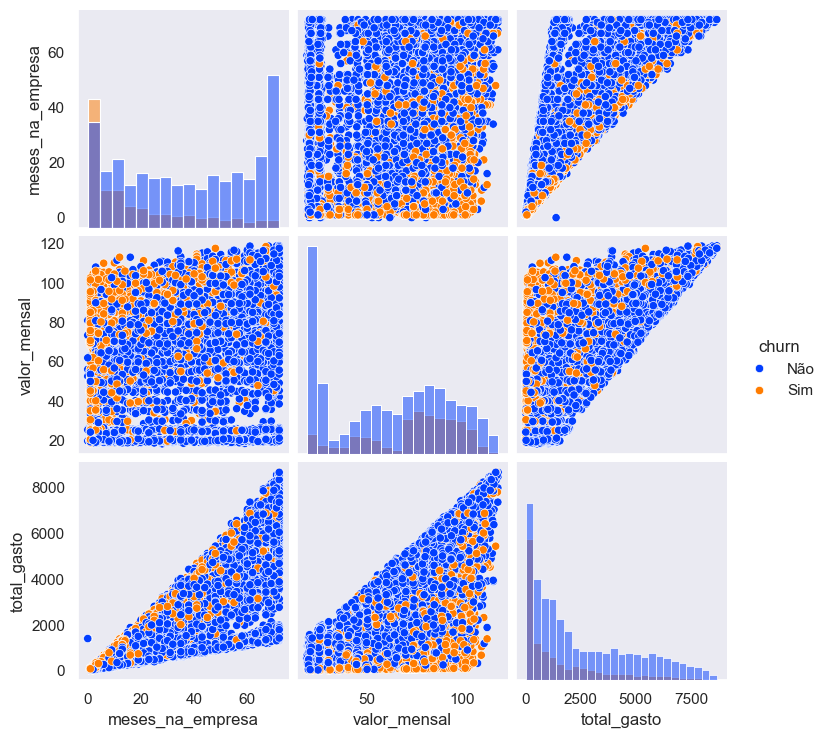

In [23]:
sns.pairplot(data=df_churn,hue='churn', diag_kind='hist');

In [24]:
df_churn.describe()

,meses_na_empresa,valor_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


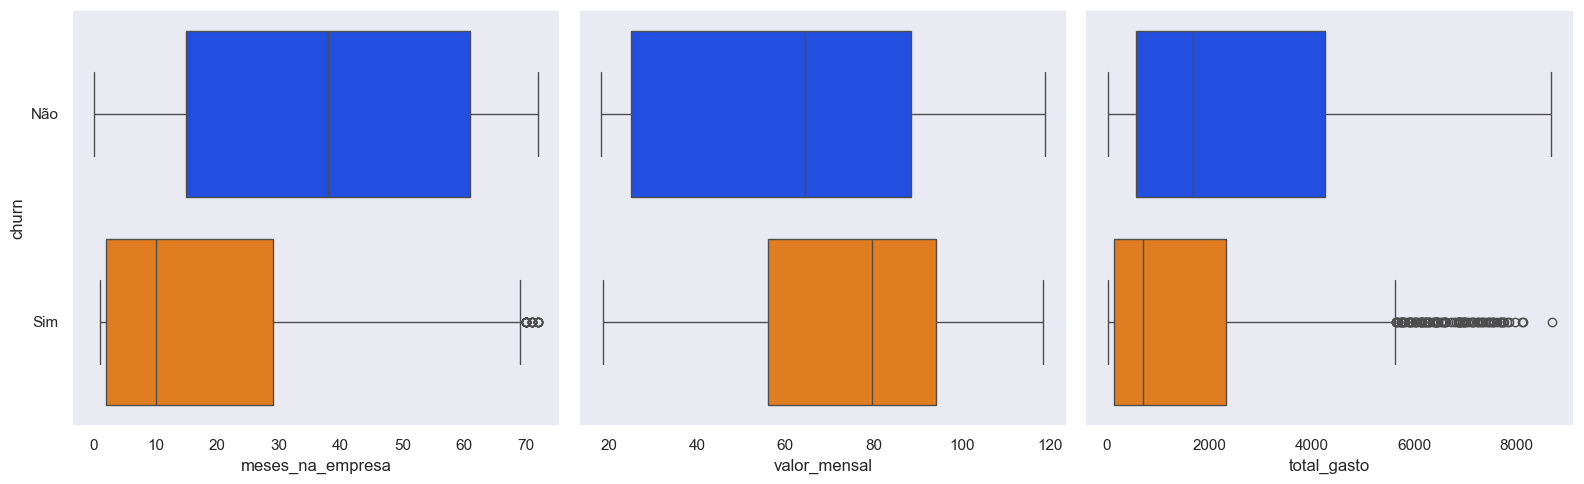

In [25]:
#describe do pandas

fig, axs= plt.subplots(nrows=1, ncols=3,figsize=(16,5),tight_layout=True, sharey=True)
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x=coluna,y='churn',data=df_churn,ax=axs[i],hue='churn')
   
plt.show()

In [26]:
print(colunas_categoricas)
print(len(colunas_categoricas))

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')
16


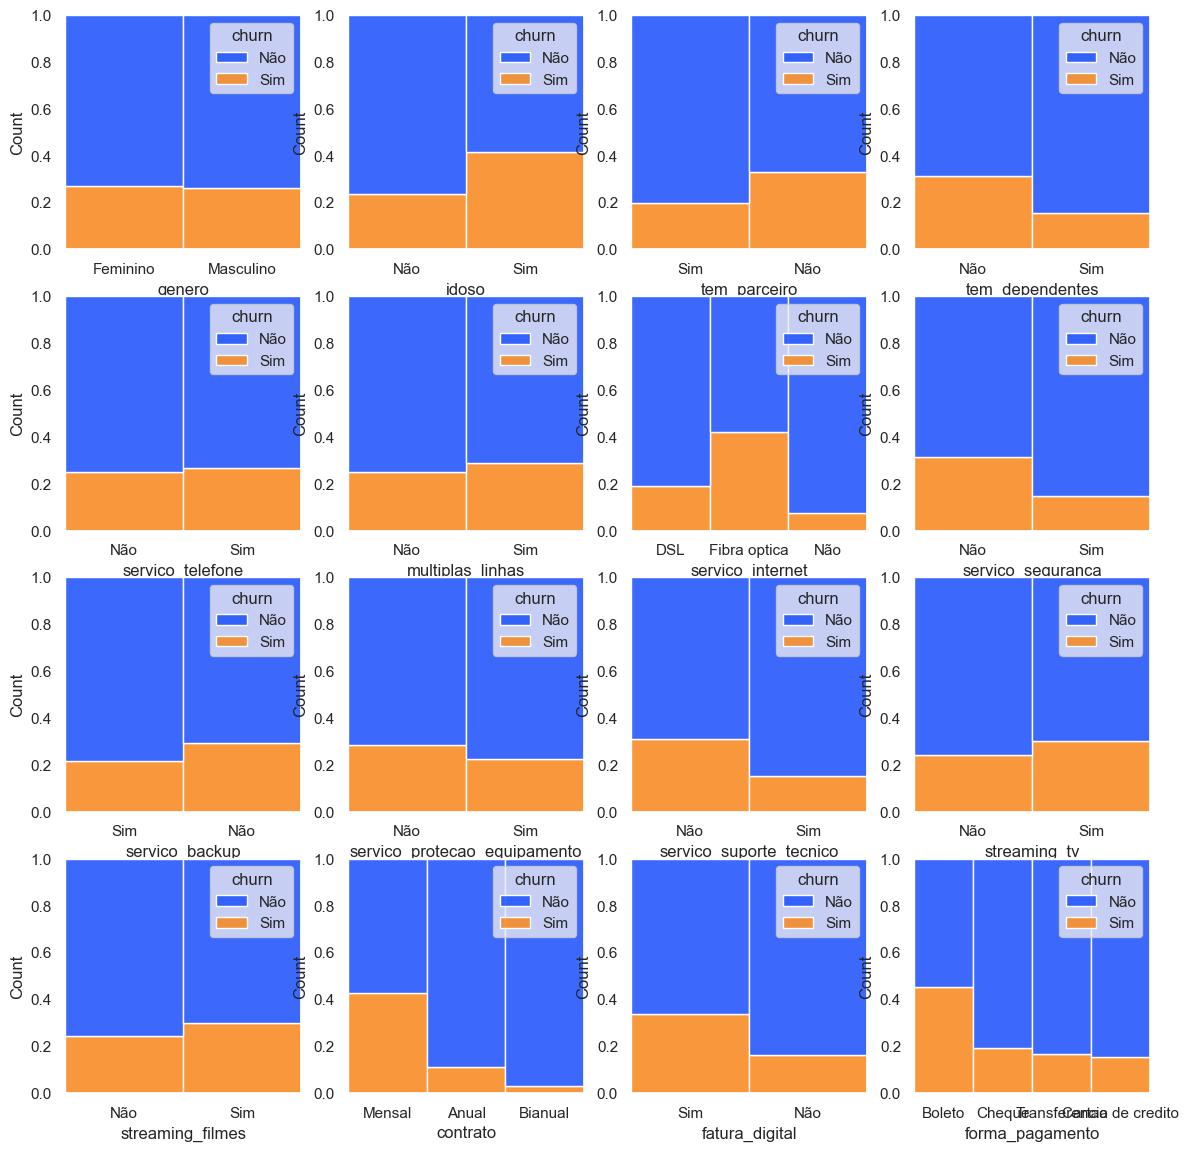

In [27]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,14))

for i, coluna in enumerate(colunas_categoricas):
    sns.histplot(x=coluna,data=df_churn,hue='churn',multiple='fill',ax=axs.flat[i])
plt.show()

plt.show()

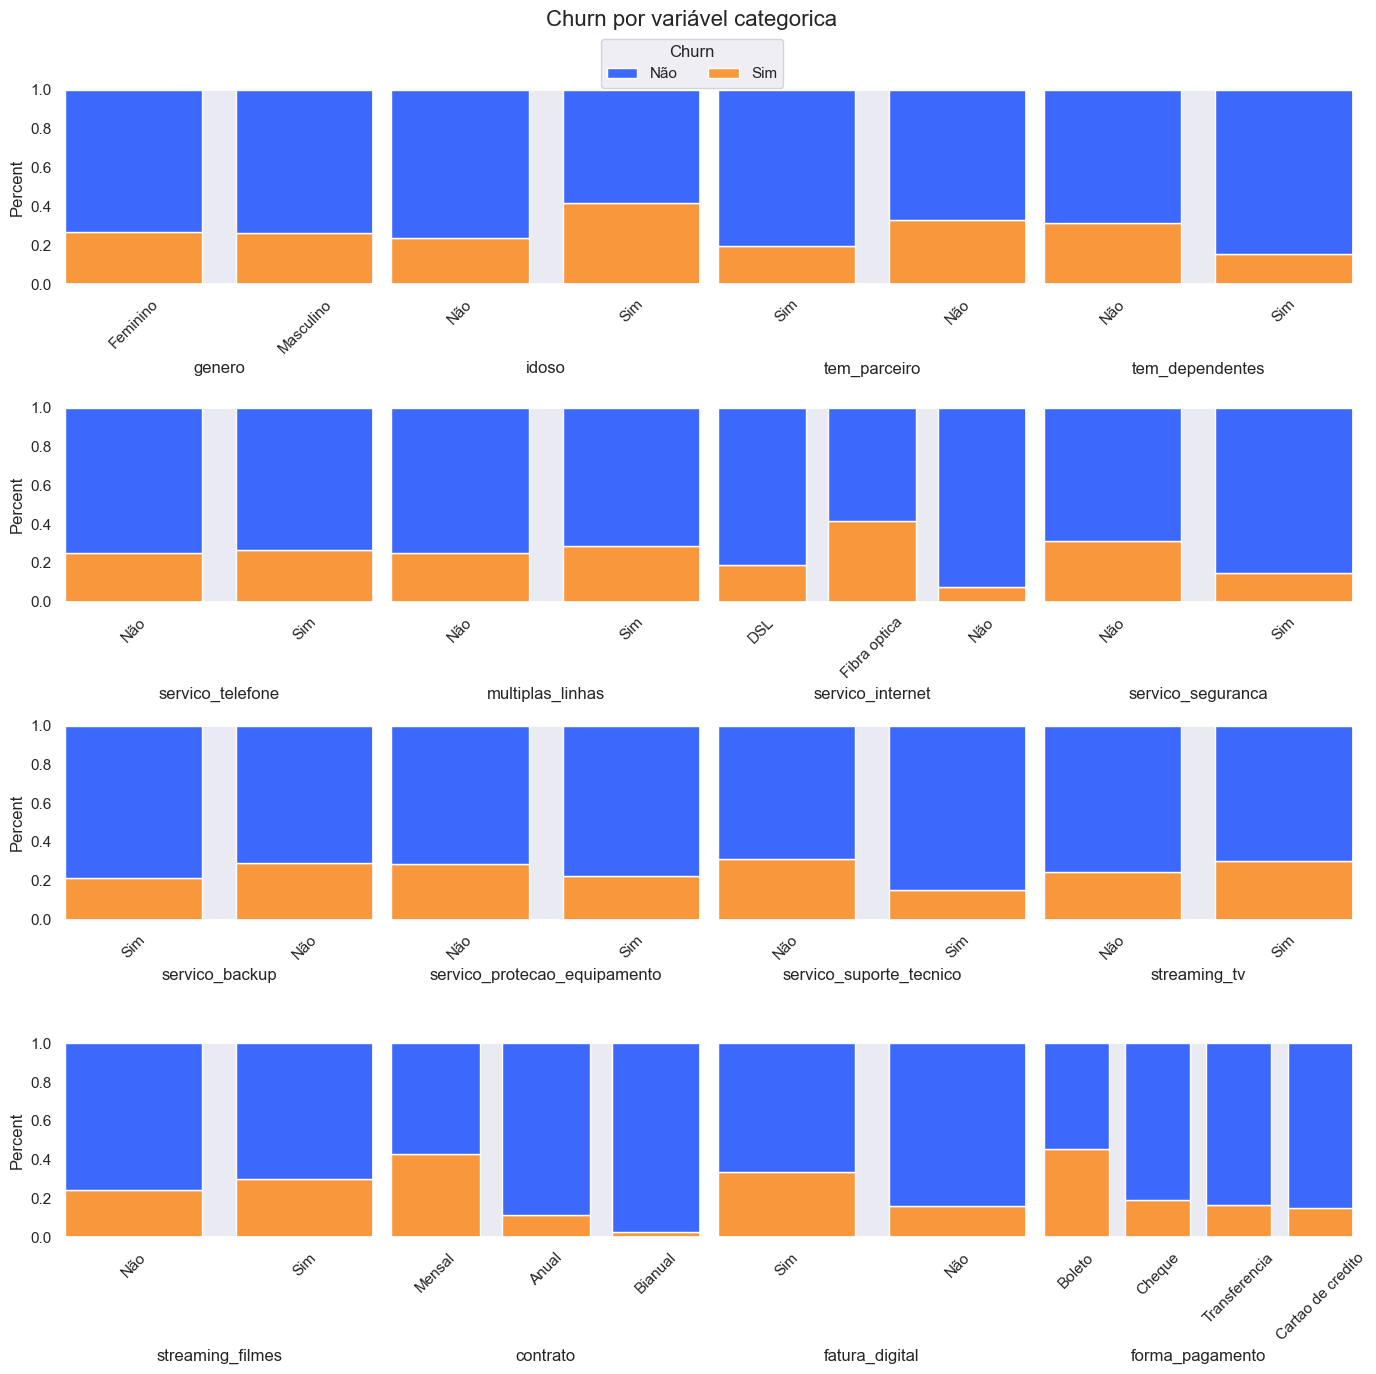

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,14),sharey=True, tight_layout = True)

for i, coluna in enumerate(colunas_categoricas):
    h=sns.histplot(x=coluna,data=df_churn,hue='churn',multiple='fill',ax=axs.flat[i],stat='percent',shrink=0.8)
    h.tick_params(axis='x',labelrotation=45,)
    legenda = h.get_legend()
    legenda.remove()

rotulos= [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title="Churn",bbox_to_anchor=(0.5,0.965))
fig.suptitle("Churn por variável categorica\n\n", fontsize=16)

fig.align_labels()

plt.show()

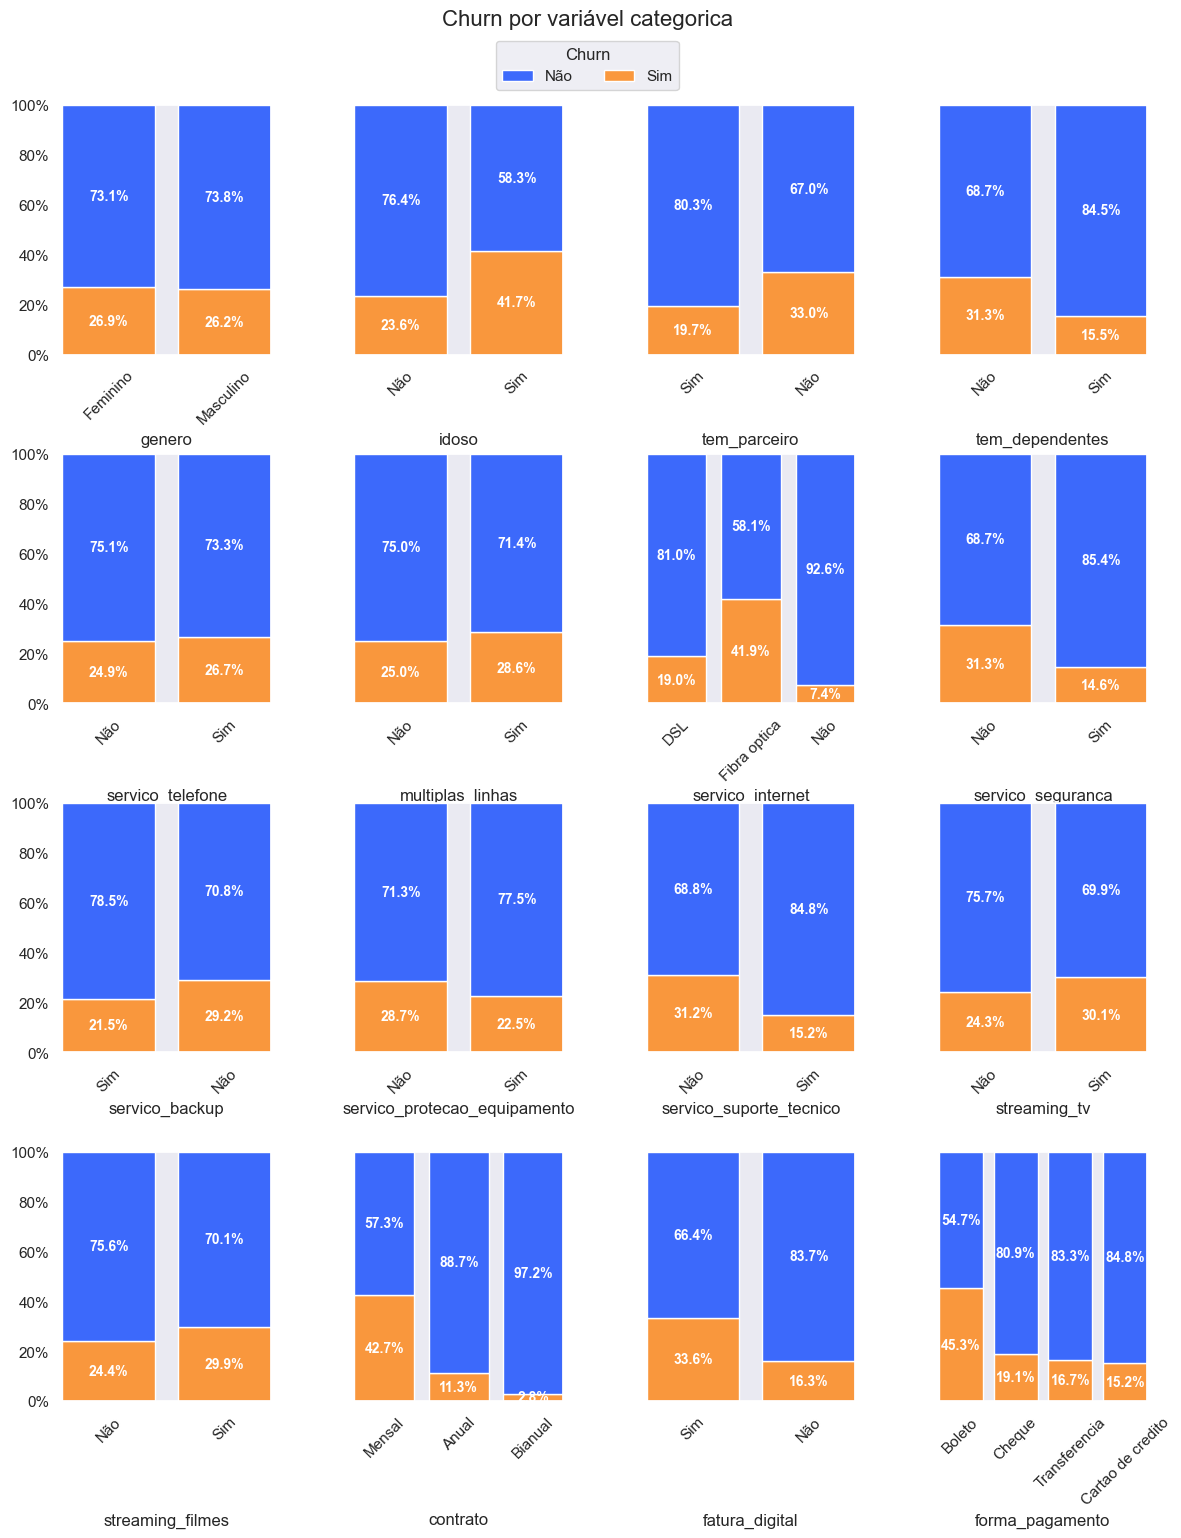

In [29]:
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,16),sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h=sns.histplot(x=coluna,data=df_churn,hue='churn',multiple='fill',ax=axs.flat[i],stat='percent',shrink=0.8)
    h.tick_params(axis='x',labelrotation=45)
    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')
    for barra in h.containers:
        h.bar_label(barra, label_type='center',labels=[f'{parte.get_height():.1%}'for parte in barra],color='white', weight='bold',
                    fontsize=10)

    legenda = h.get_legend()
    legenda.remove()

rotulos= [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title="Churn",bbox_to_anchor=(0.5,0.965))
fig.suptitle("Churn por variável categorica\n\n", fontsize=16)


fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=0.4,top=0.92)

plt.show()

<Axes: xlabel='servico_internet', ylabel='valor_mensal'>

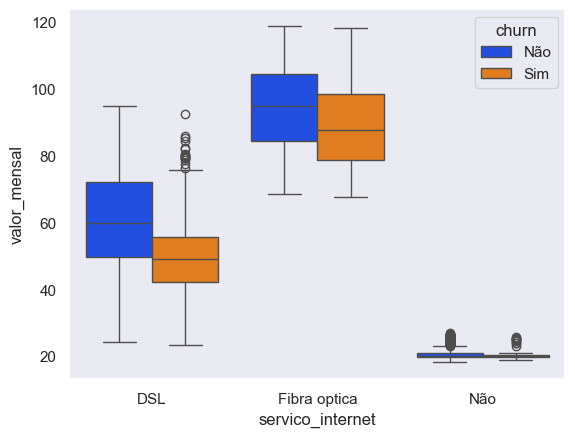

In [33]:
sns.boxplot(x='servico_internet',y='valor_mensal', data=df_churn,hue='churn')

In [35]:
df_churn.corr(numeric_only=True)

,meses_na_empresa,valor_mensal,total_gasto
meses_na_empresa,1.000000,0.247900,0.825464
valor_mensal,0.247900,1.000000,0.650864
total_gasto,0.825464,0.650864,1.000000


In [36]:
df_churn['churn'].nunique()

2

In [ ]:
df_churn['churn']= df_churn['churn'].replace({'Sim':1,'Não':0})
df_churn.head()

C:\Users\kiwsley.costa\AppData\Local\Temp\ipykernel_34216\3175298045.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['churn']= df_churn['churn'].replace({'Sim':1,'Não':0})


,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,0
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,0
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,1
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,0
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,1


In [41]:
df_dummies = pd.get_dummies(df_churn).replace({True:1,False:0})
df_dummies.head()

C:\Users\kiwsley.costa\AppData\Local\Temp\ipykernel_34216\2016897354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dummies = pd.get_dummies(df_churn).replace({True:1,False:0})


,meses_na_empresa,valor_mensal,total_gasto,churn,genero_Feminino,genero_Masculino,idoso_Não,idoso_Sim,tem_parceiro_Não,tem_parceiro_Sim,...,streaming_filmes_Sim,contrato_Anual,contrato_Bianual,contrato_Mensal,fatura_digital_Não,fatura_digital_Sim,forma_pagamento_Boleto,forma_pagamento_Cartao de credito,forma_pagamento_Cheque,forma_pagamento_Transferencia
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0


In [42]:
df_dummies.corr()

,meses_na_empresa,valor_mensal,total_gasto,churn,genero_Feminino,genero_Masculino,idoso_Não,idoso_Sim,tem_parceiro_Não,tem_parceiro_Sim,...,streaming_filmes_Sim,contrato_Anual,contrato_Bianual,contrato_Mensal,fatura_digital_Não,fatura_digital_Sim,forma_pagamento_Boleto,forma_pagamento_Cartao de credito,forma_pagamento_Cheque,forma_pagamento_Transferencia
meses_na_empresa,1.000000,0.247900,0.825464,-0.352229,-0.005106,0.005106,-0.016567,0.016567,-0.379697,0.379697,...,0.286111,0.202570,0.558533,-0.645561,-0.006152,0.006152,-0.208363,0.233006,-0.233852,0.243510
valor_mensal,0.247900,1.000000,0.650864,0.193356,0.014569,-0.014569,-0.220173,0.220173,-0.096848,0.096848,...,0.627429,0.004904,-0.074681,0.060165,-0.352150,0.352150,0.271625,0.030550,-0.377437,0.042812
total_gasto,0.825464,0.650864,1.000000,-0.199037,0.000002,-0.000002,-0.102652,0.102652,-0.318364,0.318364,...,0.519884,0.170649,0.356226,-0.445619,-0.158055,0.158055,-0.059971,0.182745,-0.294814,0.186025
churn,-0.352229,0.193356,-0.199037,1.000000,0.008612,-0.008612,-0.150889,0.150889,0.150448,-0.150448,...,0.061382,-0.177820,-0.302253,0.405103,-0.191825,0.191825,0.301919,-0.134302,-0.091683,-0.117937
genero_Feminino,-0.005106,0.014569,0.000002,0.008612,1.000000,-1.000000,-0.001874,0.001874,-0.001808,0.001808,...,0.010487,-0.008026,0.003695,0.003386,-0.011754,0.011754,-0.000752,-0.001215,-0.013744,0.016024
genero_Masculino,0.005106,-0.014569,-0.000002,-0.008612,-1.000000,1.000000,0.001874,-0.001874,0.001808,-0.001808,...,-0.010487,0.008026,-0.003695,-0.003386,0.011754,-0.011754,0.000752,0.001215,0.013744,-0.016024
idoso_Não,-0.016567,-0.220173,-0.102652,-0.150889,-0.001874,0.001874,1.000000,-1.000000,0.016479,-0.016479,...,-0.120176,0.046262,0.117000,-0.138360,0.156530,-0.156530,-0.171718,0.024135,0.153477,0.016159
idoso_Sim,0.016567,0.220173,0.102652,0.150889,0.001874,-0.001874,-1.000000,1.000000,-0.016479,0.016479,...,0.120176,-0.046262,-0.117000,0.138360,-0.156530,0.156530,0.171718,-0.024135,-0.153477,-0.016159
tem_parceiro_Não,-0.379697,-0.096848,-0.318364,0.150448,-0.001808,0.001808,0.016479,-0.016479,1.000000,-1.000000,...,-0.117412,-0.082783,-0.248091,0.280865,-0.014877,0.014877,0.083852,-0.082029,0.095125,-0.110706
tem_parceiro_Sim,0.379697,0.096848,0.318364,-0.150448,0.001808,-0.001808,-0.016479,0.016479,-1.000000,1.000000,...,0.117412,0.082783,0.248091,-0.280865,0.014877,-0.014877,-0.083852,0.082029,-0.095125,0.110706


In [44]:
churn_coor = df_dummies.corr()['churn'].sort_values(ascending=False)
print(churn_coor)

churn                                1.000000
contrato_Mensal                      0.405103
servico_internet_Fibra optica        0.308020
forma_pagamento_Boleto               0.301919
valor_mensal                         0.193356
fatura_digital_Sim                   0.191825
servico_seguranca_Não                0.171226
servico_suporte_tecnico_Não          0.164674
tem_dependentes_Não                  0.164221
idoso_Sim                            0.150889
tem_parceiro_Não                     0.150448
servico_backup_Não                   0.082255
servico_protecao_equipamento_Não     0.066160
streaming_tv_Sim                     0.063228
streaming_filmes_Sim                 0.061382
multiplas_linhas_Sim                 0.040102
servico_telefone_Sim                 0.011942
genero_Feminino                      0.008612
genero_Masculino                    -0.008612
servico_telefone_Não                -0.011942
multiplas_linhas_Não                -0.040102
streaming_filmes_Não              

In [45]:
print(type(churn_coor))

<class 'pandas.core.series.Series'>
